In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings('ignore')

### Preprocessing

In [3]:
data = pd.read_csv('bank-full.csv', sep =';')

In [4]:
data.head(6)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [5]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
## CHECH FOR MISSING VALUES

data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Target variable is highly inbalanced and this would affect the predictive power of the model greatly if it is not fixed.

### Resample Data

In [8]:
from sklearn.utils import resample

In [9]:
yes_class = data[data['y']=='yes']

In [10]:
len(yes_class)

5289

In [11]:
## select 6000 samples from the target variable

no_class_resampled = resample(data[data['y']=='no'], n_samples =6000)

In [12]:
len(no_class_resampled)

6000

In [13]:
## concatenate selected samples from target class
data_resampled = pd.concat([yes_class, no_class_resampled], axis=0)

In [14]:
len(data_resampled)

11289

### EDA

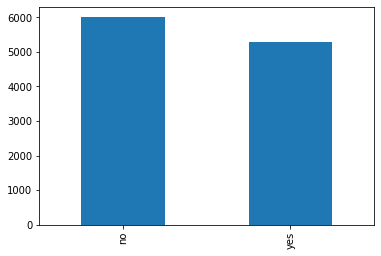

In [15]:
data_resampled['y'].value_counts().plot(kind ='bar')

In [16]:
data_resampled.groupby(['y']).mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.81700,1304.553500,15.883333,221.149333,2.846833,35.554167,0.486833
yes,41.67007,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


From the above, it is evident that customers who subscribed to a term deposit spent more time on the call than those who did not. They were also slighlty older than their counterparts and had significantly higher deposits in their bank accounts 


In [17]:
numeric_vars= data_resampled.select_dtypes(include=['int64'])

In [18]:
#numeric_vars

In [19]:
categorical_vars = data_resampled.select_dtypes(include='object')

In [20]:
#categorical_vars

In [21]:
numeric_vars.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11289.000000,11289.000000,11289.000000,11289.000000,11289.000000,11289.000000,11289.000000
mean,41.216671,1538.674285,15.543627,369.266277,2.516166,51.084684,0.807069
std,11.800078,3323.380305,8.369442,345.470543,2.736239,108.223995,2.203176
min,18.000000,-6847.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,32.000000,116.000000,8.000000,139.000000,1.000000,-1.000000,0.000000
50%,39.000000,553.000000,15.000000,251.000000,2.000000,-1.000000,0.000000
75%,49.000000,1697.000000,21.000000,491.000000,3.000000,9.000000,1.000000
max,95.000000,102127.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


Some variables have extreme cases of outliers and would have to be scaled appropraitely so as to reduce their effects on the model

In [22]:
numeric_vars.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.107121,-0.004441,-0.001732,-0.003283,-0.006191,0.020732
balance,0.107121,1.000000,0.002738,0.013962,-0.018754,0.018545,0.032315
day,-0.004441,0.002738,1.000000,-0.012731,0.133647,-0.062746,-0.050638
duration,-0.001732,0.013962,-0.012731,1.000000,-0.039285,-0.023889,-0.017297
campaign,-0.003283,-0.018754,0.133647,-0.039285,1.000000,-0.104982,-0.056236
pdays,-0.006191,0.018545,-0.062746,-0.023889,-0.104982,1.000000,0.498407
previous,0.020732,0.032315,-0.050638,-0.017297,-0.056236,0.498407,1.000000


Level of correlation between the explanatory variables is low.

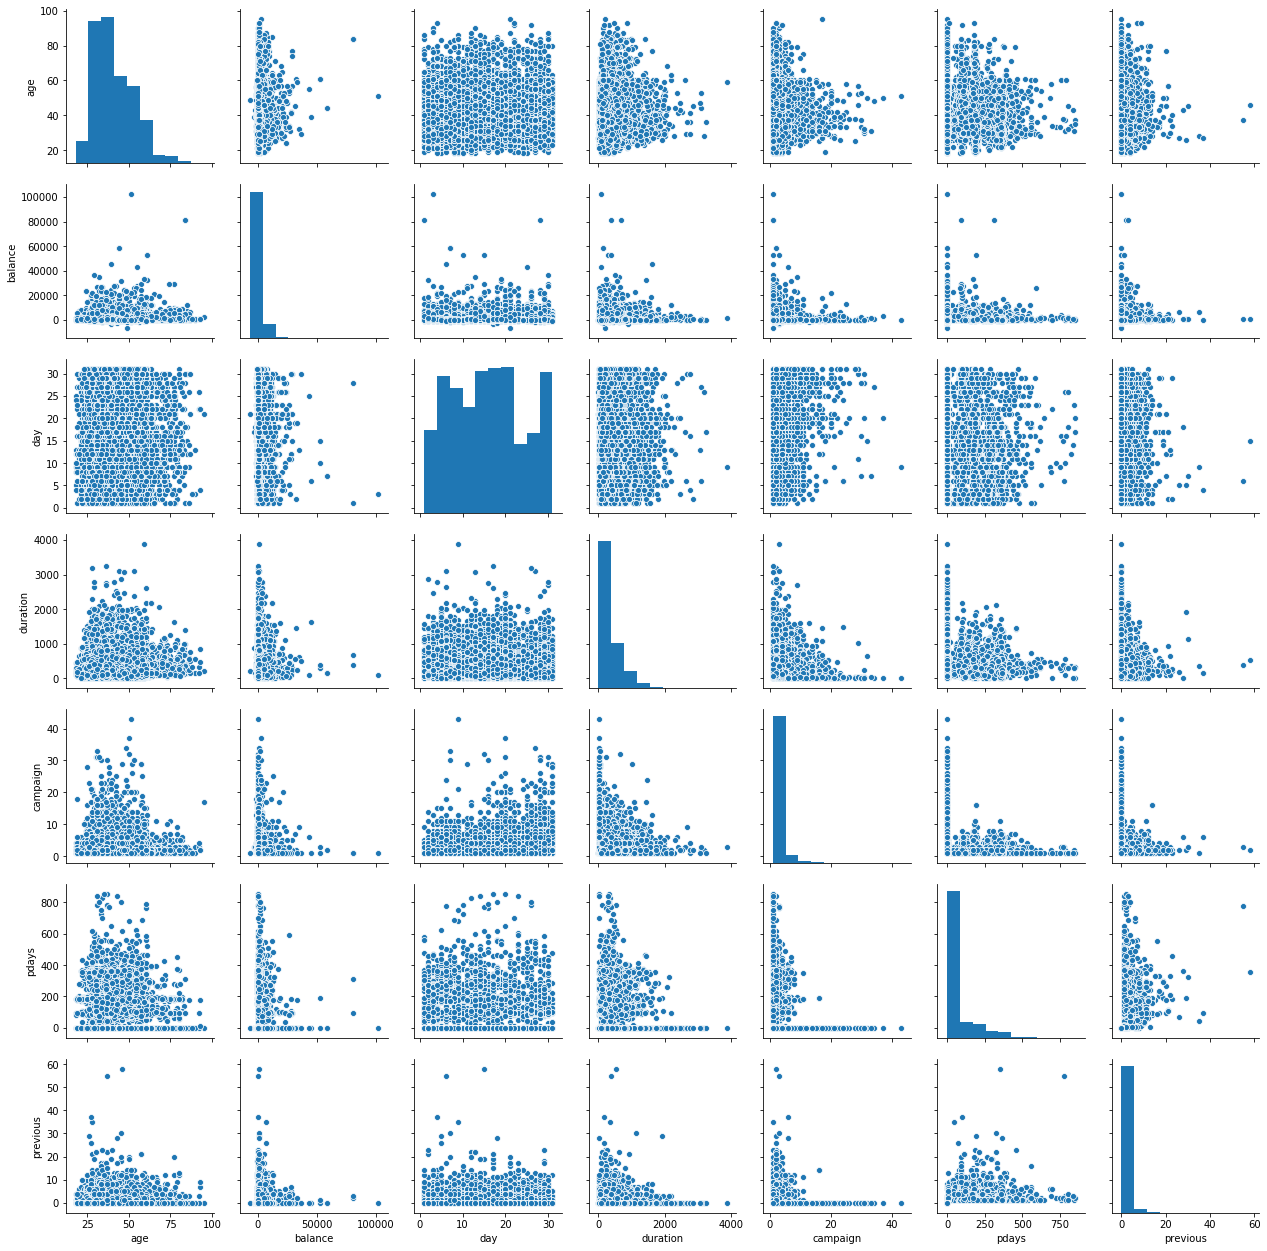

In [23]:
sns.pairplot(numeric_vars)

### Scale Numerical Variables

In [24]:
from sklearn.preprocessing import RobustScaler

In [25]:
scaler = RobustScaler(all)

In [26]:
numeric_vars_transformed= scaler.fit_transform(numeric_vars)

In [27]:
numeric_vars = pd.DataFrame(numeric_vars_transformed, columns = numeric_vars.columns)

In [28]:
numeric_vars.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11289.000000,11289.000000,11289.000000,11289.000000,11289.000000,11289.000000,11289.000000
mean,0.130392,0.623450,0.041817,0.335984,0.258083,5.208468,0.807069
std,0.694122,2.102075,0.643803,0.981450,1.368120,10.822400,2.203176
min,-1.235294,-4.680582,-1.076923,-0.701705,-0.500000,0.000000,0.000000
25%,-0.411765,-0.276407,-0.538462,-0.318182,-0.500000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.588235,0.723593,0.461538,0.681818,0.500000,1.000000,1.000000
max,3.294118,64.246679,1.230769,10.312500,20.500000,85.500000,58.000000


In [29]:
from sklearn.preprocessing import Binarizer

In [30]:
bn = Binarizer(threshold= 0.9)

In [123]:
#create new binary feature from pdays (0 represents no previous meeting while 1 represents previous meeting) 
categorical_vars['pmeeting'] = bn.transform(data_resampled['pdays'].values.reshape(-1,1))


In [43]:
#categorical_vars

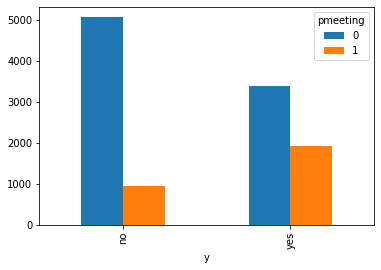

In [124]:
pd.crosstab(categorical_vars['y'], categorical_vars['pmeeting']).plot.bar()

The chart above shows that customers that had no prior contact were less likely to subscribe to the term deposits

In [46]:
pd.crosstab(categorical_vars['y'], categorical_vars['education'])

education,primary,secondary,tertiary,unknown
y,,,,
no,963,3158,1635,244
yes,591,2450,1996,252


Level of education has a slight impact on subscription as it is visible that people with a tetiary education were more likely to subscribed as opposed to those without.

In [47]:
categorical_vars.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y', 'pmeeting'],
      dtype='object')

In [48]:
pd.crosstab(categorical_vars['y'], categorical_vars['contact'])

contact,cellular,telephone,unknown
y,,,
no,3729,339,1932
yes,4369,390,530


Subscription rate was slightly higher for customers who were reached via cellular

### Get Dummies of Categorical Variables

In [49]:
categorical_vars_dummies = pd.get_dummies(categorical_vars)

In [50]:
categorical_vars_dummies.shape

(11289, 47)

In [51]:
categorical_vars_dummies.reset_index(inplace = True)

In [52]:
data_complete = pd.concat([categorical_vars_dummies,numeric_vars], axis=1)

In [53]:
data_complete.columns

Index(['index', 'pmeeting', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y_no', 'y_yes', 'age', 'balance', 'day',
       'duration', 'campaign', 'pdays', 'previous'],
      dtype='object')

In [54]:
X=data_complete.drop(labels=['index','y_no','y_yes'], axis = 1)

In [55]:
y= data_resampled['y']

In [56]:
y_map ={'no':0, 'yes': 1}

y = y.map(y_map)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10, test_size=0.25)

### MODELING

### Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
reg = LogisticRegression()

In [61]:
reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
reg.score(X_test,y_test)

0.8398866454126815

In [63]:
reg_pred = reg.predict(X_test)

In [118]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score

In [65]:
confusion_matrix(reg_pred, y_test)

array([[1292,  258],
       [ 194, 1079]], dtype=int64)

In [66]:
print(classification_report(reg_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1550
           1       0.81      0.85      0.83      1273

    accuracy                           0.84      2823
   macro avg       0.84      0.84      0.84      2823
weighted avg       0.84      0.84      0.84      2823



### Hyperparameter tuning of Logistic Regression

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
reg.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [69]:
reg_grid = {'solver':['newton-cg','lbfgs','liblinear'],
        'penalty': ['l2'],
        'C':[0.1,1.0,10]}

In [70]:
reg_grid_search = GridSearchCV(estimator=reg, param_grid=reg_grid, n_jobs=-1, verbose=1)

In [71]:
reg_grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   10.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 1.0, 10], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [72]:
reg_grid_search.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}

In [92]:
reg1=LogisticRegression(C=0.1, penalty='l2', solver='lbfgs')

In [93]:
reg1.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
reg1.score(X_train, y_train)

0.8365225608315615

In [95]:
reg1_pred = reg1.predict(X_test)

In [96]:
confusion_matrix(reg1_pred, y_test)

array([[1290,  268],
       [ 196, 1069]], dtype=int64)

In [97]:
print(classification_report(reg1_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1558
           1       0.80      0.85      0.82      1265

    accuracy                           0.84      2823
   macro avg       0.83      0.84      0.83      2823
weighted avg       0.84      0.84      0.84      2823



### Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rfc = RandomForestClassifier()

### Hyperparameter Tuning of Random Forest 

In [83]:
grid = {'n_estimators':[100,250,500], 
        'max_features':['auto','sqrt','log2'],
        'criterion':['gini','entropy'],
       'max_depth':[3,5,9]}

In [86]:
gridsearch = GridSearchCV(estimator=rfc, param_grid= grid, verbose = 1, n_jobs=-1)

In [87]:
gridsearch.fit(X_train,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  2.4min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [88]:
gridsearch.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [89]:
rfc1 = RandomForestClassifier(n_estimators=500,criterion='entropy', max_depth=9)

In [90]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [91]:
rfc1.score(X_train,y_train)

0.8848334514528703

In [98]:
rfc_pred = rfc1.predict(X_test)

In [99]:
confusion_matrix(y_test, rfc_pred)

array([[1241,  245],
       [ 184, 1153]], dtype=int64)

In [121]:
precision_score(y_test, rfc_pred)

0.8247496423462088

In [122]:
recall_score(y_test, rfc_pred)

0.862378459237098

### AdaBoosting Algorithm 

In [102]:
from sklearn.ensemble import AdaBoostClassifier

In [103]:
ada = AdaBoostClassifier(base_estimator=rfc1, n_estimators=100)

In [104]:
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=9,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=500,
                        

In [105]:
ada.score(X_train, y_train)

0.9974013701866289

In [106]:
ada_pred = ada.predict(X_test)

In [109]:
confusion_matrix(ada_pred, y_test)

array([[1285,  147],
       [ 201, 1190]], dtype=int64)

In [119]:
precision_score(ada_pred, y_test)

0.8900523560209425

In [120]:
recall_score(ada_pred, y_test)

0.8554996405463695

In [116]:
import joblib

In [117]:
## serialize adaboost model
model = joblib.dump(ada, 'marketing_predictions_model.pkl')